In [194]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import matplotlib.colorbar as colorbar
import matplotlib.ticker as ticker
from matplotlib import colormaps

import seaborn as sns

import pickle as pkl

In [195]:
# Load data
with open('statistics.pkl', 'rb') as f:
    data = pkl.load(f)

print(data)

# DEFINE TEAM NAMES
PLAYER_1_NAME = 'Player 1'
PLAYER_2_NAME = 'Player 2'
PLAYER_3_NAME = 'Player 3'
PLAYER_4_NAME = 'Player 4'

TEAM_1_NAME = PLAYER_1_NAME + ' & ' + PLAYER_3_NAME
TEAM_2_NAME = PLAYER_2_NAME + ' & ' + PLAYER_4_NAME

{0: {'score': [1, 5], 'truncated': False, 'player1': {'ball_touches': 2741, 'goals': 1, 'own_goals': 0, 'saves': 75, 'blocked_shots': 327, 'assists': 0, 'shots': 165, 'direct_shots': 121, 'passes': 4, 'heat_map': [[2761, 160, 83, 122, 88, 20, 0, 0], [3686, 877, 257, 98, 47, 0, 0, 0], [2943, 1176, 718, 238, 69, 75, 0, 0], [3201, 7415, 690, 201, 25, 20, 0, 0], [2683, 604, 531, 158, 108, 104, 15, 0], [3367, 496, 309, 206, 113, 33, 0, 0]]}, 'player2': {'ball_touches': 14858, 'goals': 3, 'own_goals': 0, 'saves': 4, 'blocked_shots': 1393, 'assists': 0, 'shots': 3211, 'direct_shots': 3159, 'passes': 8, 'heat_map': [[2438, 82, 148, 172, 294, 132, 79, 0], [4172, 160, 242, 304, 448, 670, 1744, 135], [49, 54, 94, 285, 436, 845, 413, 181], [51, 138, 180, 2862, 2050, 680, 567, 1015], [2329, 346, 335, 303, 2420, 355, 280, 46], [4804, 472, 116, 169, 239, 174, 152, 37]]}, 'player3': {'ball_touches': 4193, 'goals': 0, 'own_goals': 1, 'saves': 21, 'blocked_shots': 1983, 'assists': 0, 'shots': 1261, 'dir

Number of truncated games:  6
Number of finished games:  44


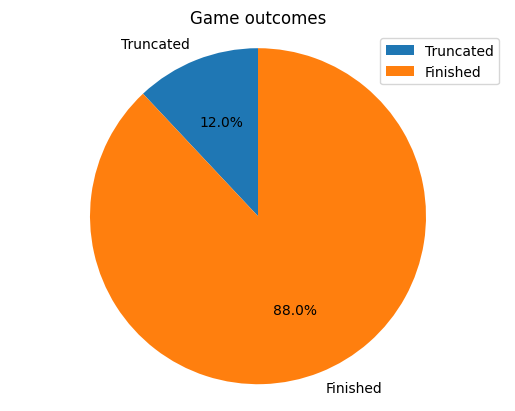

In [196]:
truncated = []
finished = []

for game_id, game in data.items():
    if game['truncated']:
        truncated.append(game)
    else:
        finished.append(game)

print("Number of truncated games: ", len(truncated))
print("Number of finished games: ", len(finished))

# pie chart of game outcomes
labels = 'Truncated', 'Finished'
sizes = [len(truncated), len(finished)]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Game outcomes')
plt.legend()
plt.show()



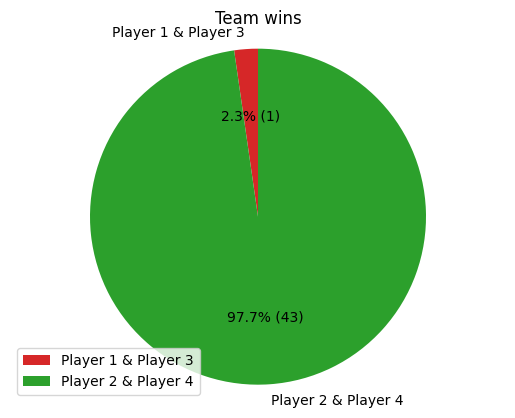

In [210]:
finished_game_scores = [game['score'] for game in finished]

wins = {
    "team1": 0,
    "team2": 0
}

for game in finished:
    if game['score'][0] > game['score'][1]:
        wins["team1"] += 1
    else:
        wins["team2"] += 1

# pie chart of team wins
labels = TEAM_1_NAME, TEAM_2_NAME
sizes = [wins["team1"], wins["team2"]]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct=lambda p: '{:.1f}% ({:,.0f})'.format(p,(p/100)*sum(sizes)), startangle=90, colors=('tab:red', 'tab:green'))
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Team wins')
plt.legend()
plt.show()


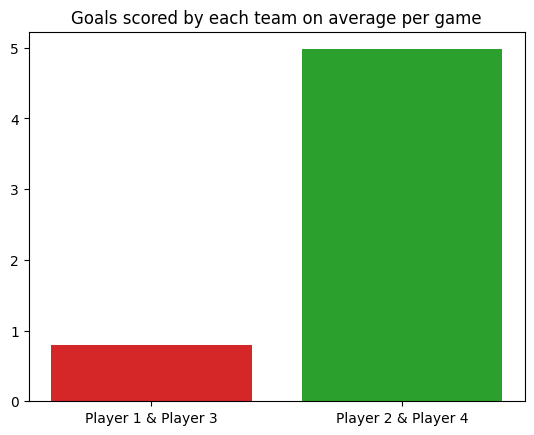

In [198]:
# Calculate how many goals each team scored
team1_goals = 0
team2_goals = 0

for game in finished:
    team1_goals += game['score'][0]
    team2_goals += game['score'][1]

# bar chart of goals scored by each team
labels = TEAM_1_NAME, TEAM_2_NAME
sizes = [team1_goals / len(finished), team2_goals / len(finished)]

fig1, ax1 = plt.subplots()
ax1.bar(labels, sizes, color=['tab:red', 'tab:green'])
plt.title('Goals scored by each team on average per game')
plt.show()

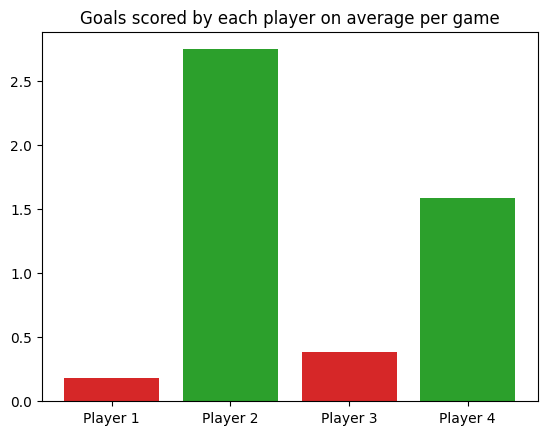

In [199]:
# Calculate how many goals each player scored
player1_goals = 0
player2_goals = 0
player3_goals = 0
player4_goals = 0

for game in finished:
    player1_goals += game['player1']['goals']
    player2_goals += game['player2']['goals']
    player3_goals += game['player3']['goals']
    player4_goals += game['player4']['goals']

# bar chart of goals scored by each player
labels = PLAYER_1_NAME, PLAYER_2_NAME, PLAYER_3_NAME, PLAYER_4_NAME
sizes = [player1_goals / len(finished), player2_goals / len(finished), player3_goals / len(finished), player4_goals / len(finished)]

fig1, ax1 = plt.subplots()
ax1.bar(labels, sizes, color=['tab:red', 'tab:green', 'tab:red', 'tab:green'])
plt.title('Goals scored by each player on average per game')
plt.show()


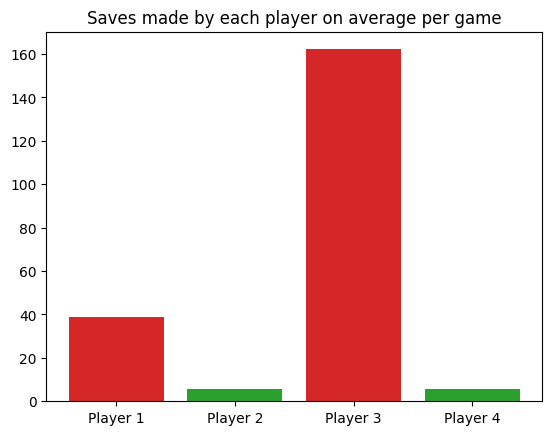

In [200]:
player1_saves = 0
player2_saves = 0
player3_saves = 0
player4_saves = 0

for game in finished:
    player1_saves += game['player1']['saves']
    player2_saves += game['player2']['saves']
    player3_saves += game['player3']['saves']
    player4_saves += game['player4']['saves']

# bar chart of saves made by each player
labels = PLAYER_1_NAME, PLAYER_2_NAME, PLAYER_3_NAME, PLAYER_4_NAME
sizes = [player1_saves / len(finished), player2_saves / len(finished), player3_saves / len(finished), player4_saves / len(finished)]
         
fig1, ax1 = plt.subplots()
ax1.bar(labels, sizes, color=['tab:red', 'tab:green', 'tab:red', 'tab:green'])
plt.title('Saves made by each player on average per game')
plt.show()


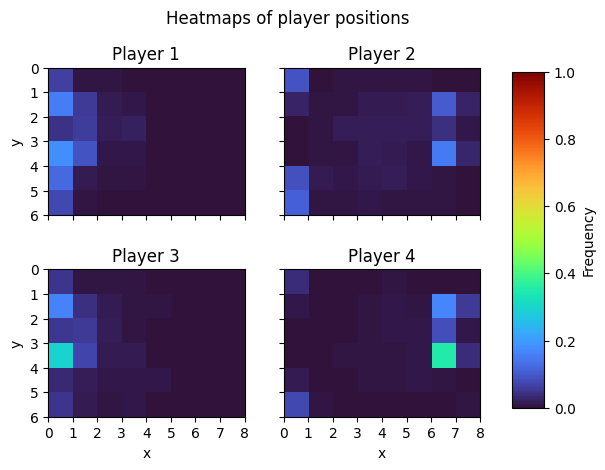

In [201]:
heatmap_x = len(finished[0]['player1']['heat_map'])
heatmap_y = len(finished[0]['player1']['heat_map'][0])

player_heatmaps = [np.zeros((heatmap_x, heatmap_y)) for _ in range(4)]


for game in finished:
    for i in range(4):
        player_heatmaps[i] += game[f'player{i+1}']['heat_map']

for i in range(4):
    # normalize heatmap to be between 0 and 1
    total = np.sum(player_heatmaps[i])
    #player_heatmaps[i] = player_heatmaps[i] / total
    #print(player_heatmaps[i])

# Plot heatmaps
fig, axs = plt.subplots(2, 2)
fig.suptitle('Heatmaps of player positions')

colormap = colormaps.get_cmap('turbo')

for i, ax in enumerate(axs.flat):
    ax.imshow(player_heatmaps[i], cmap=colormap, extent=[0, heatmap_y, heatmap_x, 0], vmin=0, vmax=np.sum(player_heatmaps[i]))
    ax.set_title(f'Player {i+1}')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_aspect('equal')
    ax.set_xticks(np.arange(0, heatmap_y+1, 1))
    ax.set_yticks(np.arange(0, heatmap_x+1, 1))
    #draw grid
    #
    #ax.grid(color='white', linestyle='-', linewidth=0.5)



# # Create text labels
# for i, ax in enumerate(axs.flat):
#     for x in range(heatmap_x):
#         for y in range(heatmap_y):
#             if player_heatmaps[i][x, y] > 0.01:
#                 ax.text(y, x, f'{player_heatmaps[i][x, y]:.2f}', ha='center', va='center', color='black', fontsize=6)

for ax in axs.flat:
    ax.label_outer()

# add color bar
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
norm = mcolors.Normalize(vmin=0, vmax=1)
sm = cm.ScalarMappable(norm=norm, cmap=colormap)
sm.set_array([])
fig.colorbar(sm, cax=cbar_ax)
cbar_ax.set_ylabel('Frequency')


plt.show()



[['Ball touches', 80001, 233605, 74677, 70352], ['Goals', 8, 121, 17, 70], ['Own goals', 13, 7, 15, 3], ['Saves', 1710, 245, 7137, 259], ['Blocked shots', 13211, 26473, 11622, 2037], ['Shots', 12794, 39947, 14037, 4283], ['Direct shots', 11287, 39080, 12667, 3782], ['Assists', 1, 1, 0, 5], ['Passes', 1538, 171, 1403, 164]]


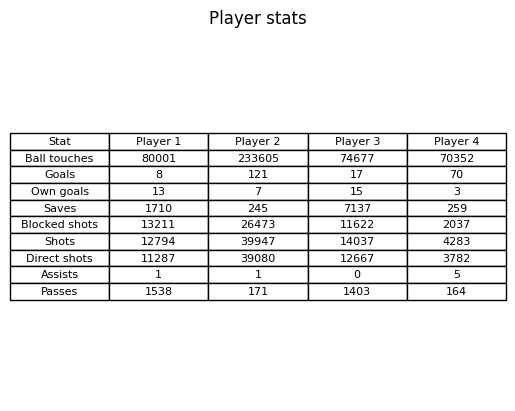

In [207]:
#                 player1 player2 player3 player4
# Ball touches:   1531    7031    1204    6
# Goals:          1       4       0       0
# Own goals:      0       0       0       0
# Saves:          10      0       3       6
# Blocked shots:  174     329     25      0
# Shots:          94      486     26      1
# Direct shots:   88      454     8       1
# Assists:        0       0       1       0
# Passes:         0       0       0       0

player_stats = {}

# get player player_stats
for game in finished:
    for k, v in game.items():
        if "player" in k:
            if k not in player_stats:
                player_stats[k] = {
                    "ball_touches": 0,
                    "goals": 0,
                    "own_goals": 0,
                    "saves": 0,
                    "blocked_shots": 0,
                    "shots": 0,
                    "direct_shots": 0,
                    "assists": 0,
                    "passes": 0
                }

            player_stats[k]["ball_touches"] += v["ball_touches"]
            player_stats[k]["goals"] += v["goals"]
            player_stats[k]["own_goals"] += v["own_goals"]
            player_stats[k]["saves"] += v["saves"]
            player_stats[k]["blocked_shots"] += v["blocked_shots"]
            player_stats[k]["shots"] += v["shots"]
            player_stats[k]["direct_shots"] += v["direct_shots"]
            player_stats[k]["assists"] += v["assists"]
            player_stats[k]["passes"] += v["passes"]


table_data = {
    "ball_touches": [],
    "goals": [],
    "own_goals": [],
    "saves": [],
    "blocked_shots": [],
    "shots": [],
    "direct_shots": [],
    "assists": [],
    "passes": []
}
    

def get_players_stat(stat):
    for k, v in player_stats.items():
        for k2, v2 in v.items():
            if k2 == stat:
                table_data[k2].append(v2)

for k, v in table_data.items():
    get_players_stat(k)


table_data2 = []
for k, v in table_data.items():
    name = k.replace('_', ' ').capitalize()
    table_data2.append([name] + v)

print(table_data2)

#Plot a table of player stats where each row is a stat and each column is a player
fig, ax = plt.subplots()
ax.axis('off')

ax.table(cellText=table_data2, colLabels=["Stat", PLAYER_1_NAME, PLAYER_2_NAME, PLAYER_3_NAME, PLAYER_4_NAME], cellLoc='center', loc='center')

plt.title('Player stats')
plt.show()



